In [ ]:
# Name : Yogyata Chaubey
# GRIP Data science Intern
# The Spark Foundation

# Task - 4 : Decision Tree Algorithm

In [ ]:
# Importing libraries in Python

import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import seaborn as sns


In [ ]:
#Filtering the warnings

import warnings
warnings.filterwarnings('ignore')


In [ ]:
iris = datasets.load_iris()

In [ ]:
data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])

Creating a new column “Species” with target values from the dataset, I am using lambda function to apply a function so as to convert the target values which are 0,1,2 to the corresponding target values(“setosa”,”versicolor”,”virginica”)

In [ ]:
data['Species']=iris['target']

In [ ]:
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


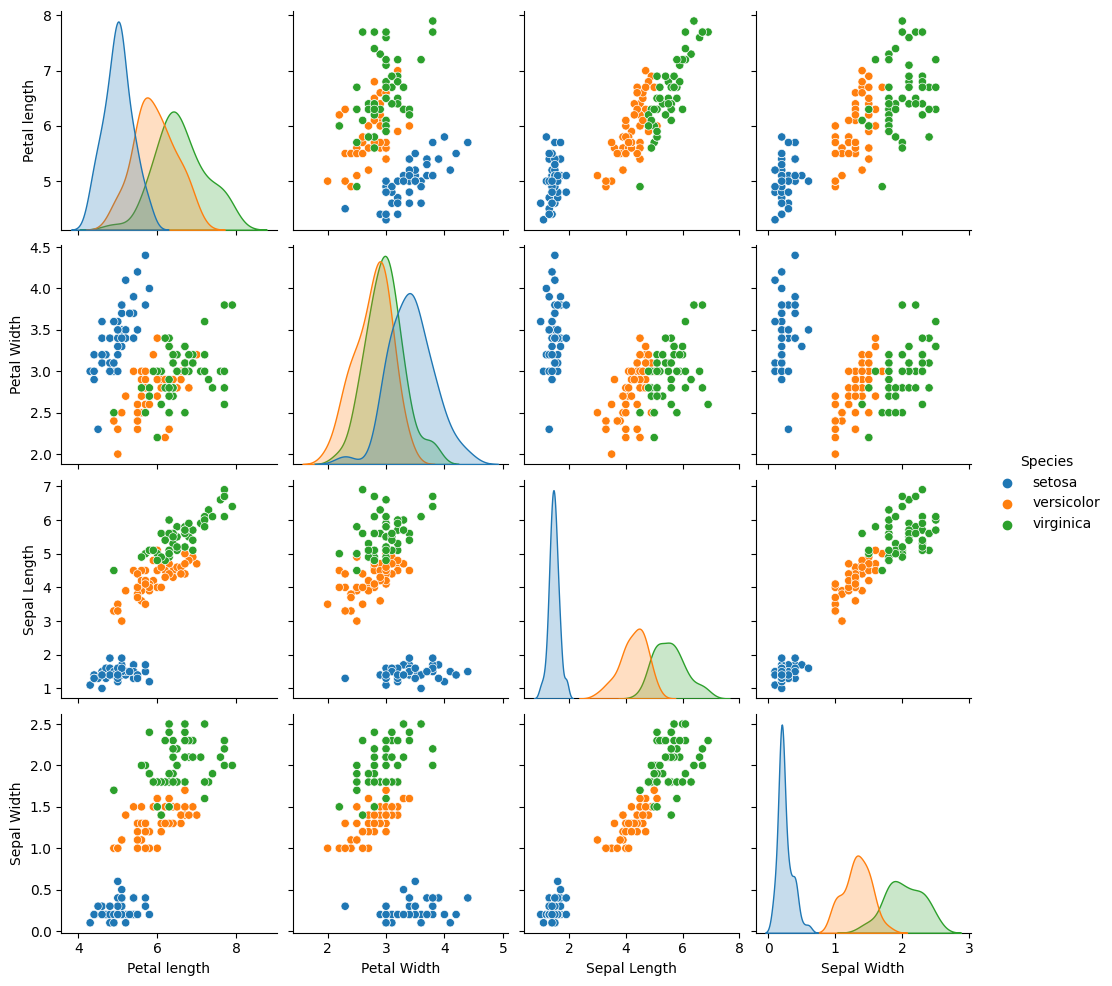

In [ ]:
sns.pairplot(data, hue = 'Species')
plt.show()

[]

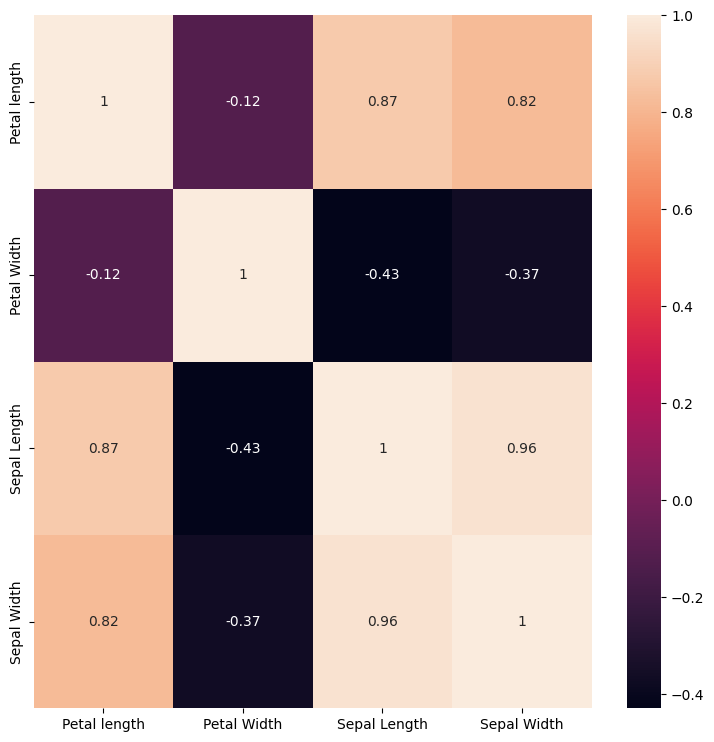

In [ ]:
# Lets Check correlation using Heatmap
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(),annot=True)
plt.plot()

Observations made -

Petal length is highly related to petal width.
Sepal lenth is not related sepal width

<Axes: xlabel='Species', ylabel='Petal Width'>

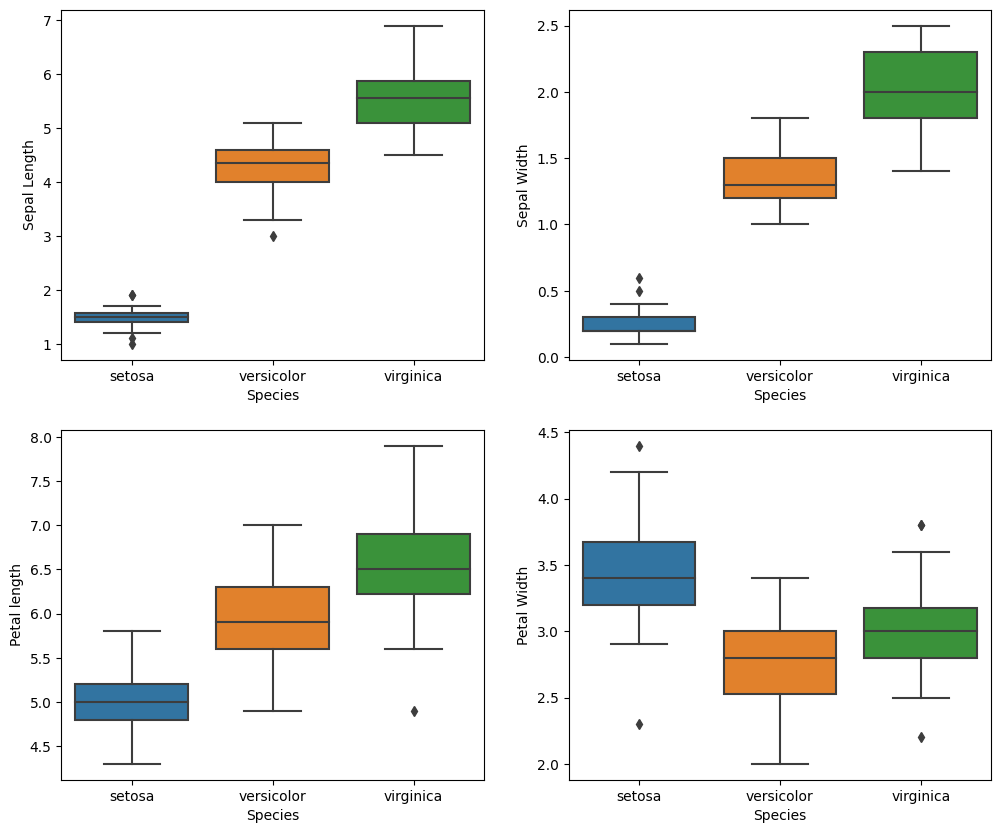

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="Sepal Length",data=data)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="Sepal Width",data=data)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="Petal length",data=data)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="Petal Width",data=data)

In [ ]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(data,test_size=0.3)

In [ ]:
train_X=train[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
train_y=train.Species

In [ ]:
test_X=test[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
test_y=test.Species

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier(random_state=12)
model = DT.fit(train_X, train_y)

In [ ]:
DT.predict(test_X)

array(['setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'setosa', 'setosa', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor'], dtype=object)

In [ ]:
# Check the accuracy of Model
DT.score(test_X, test_y)

0.9333333333333333

In [ ]:
#prediction
y_pred = DT.predict(test_X)

In [ ]:
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(test_y, y_pred))

Accuracy Score: 0.9333333333333333


In [ ]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

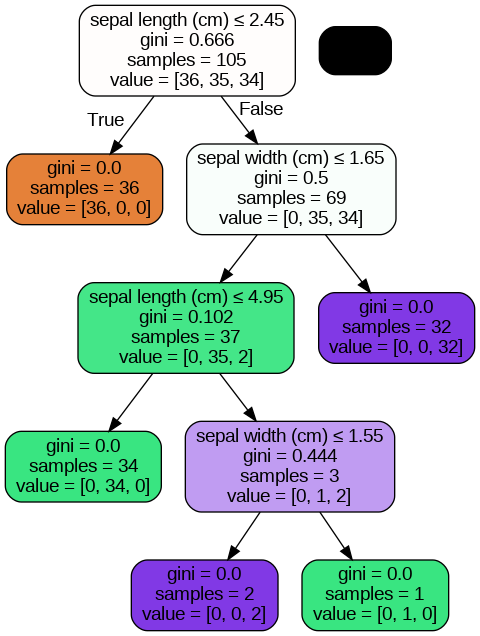

In [ ]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())